In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns
import unidecode, re
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from scipy import *
from sklearn.feature_selection import SelectKBest, f_regression
from catboost import CatBoostClassifier
import lightgbm as lgb
import joblib

In [2]:
# Basic config
my_font = dict(
            family="Courier New, monospace",
            size=18,
            color="Black",
            variant="small-caps",
) 

In [3]:
df = pd.read_csv("data/train.csv")
df.head()

,DT_NOTIFIC,CS_SEXO,CO_RG_RESI,ID_MN_RESI,CS_ZONA,NU_IDADE_N,CS_ESCOL_N,CS_RACA,SG_UF,CS_GESTANT,...,TOSSE,GARGANTA,DESC_RESP,DIARREIA,VOMITO,FADIGA,SATURACAO,DISPNEIA,VACINA,EVOLUCAO
0,2020-04-04,F,NaN,RIO DE JANEIRO,1.0,84,9.0,2.0,RJ,5,...,1.0,2.0,1.0,2.0,2.0,NaN,1.0,1.0,9.0,1.0
1,2020-05-07,M,NaN,RIO DE JANEIRO,1.0,68,9.0,9.0,RJ,6,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,9.0,0.0
2,2020-04-23,M,1331.0,SAO PAULO,1.0,44,9.0,4.0,SP,6,...,1.0,2.0,1.0,2.0,2.0,NaN,1.0,1.0,2.0,0.0
3,2020-08-17,M,1553.0,CHAPECO,1.0,87,1.0,1.0,SC,6,...,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0
4,2020-08-14,F,NaN,RIO DE JANEIRO,1.0,91,9.0,9.0,RJ,6,...,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,9.0,0.0


In [4]:
df.isnull().sum()

DT_NOTIFIC         0
CS_SEXO            0
CO_RG_RESI     73185
ID_MN_RESI        44
CS_ZONA        52838
NU_IDADE_N         0
CS_ESCOL_N    146901
CS_RACA        19384
SG_UF             44
CS_GESTANT         0
PUERPERA      298765
DIABETES      252391
PNEUMOPATI    292402
IMUNODEPRE    295546
RENAL         292734
OBESIDADE     290862
OBES_IMC      483795
CARDIOPATI    236183
SIND_DOWN     298085
HEPATICA      297733
FATOR_RISC    179966
FEBRE          60770
TOSSE          52380
GARGANTA      124438
DESC_RESP      83604
DIARREIA      129733
VOMITO        136659
FADIGA        268807
SATURACAO      77360
DISPNEIA       54168
VACINA        101083
EVOLUCAO           0
dtype: int64

In [5]:
df.groupby('SG_UF').size().reset_index(name='count').sort_values(by='count', ascending=False)

,SG_UF,count
25,SP,144896
18,RJ,54916
10,MG,37441
22,RS,25821
17,PR,25644
15,PE,22922
5,CE,19868
4,BA,17989
8,GO,17240
23,SC,16459


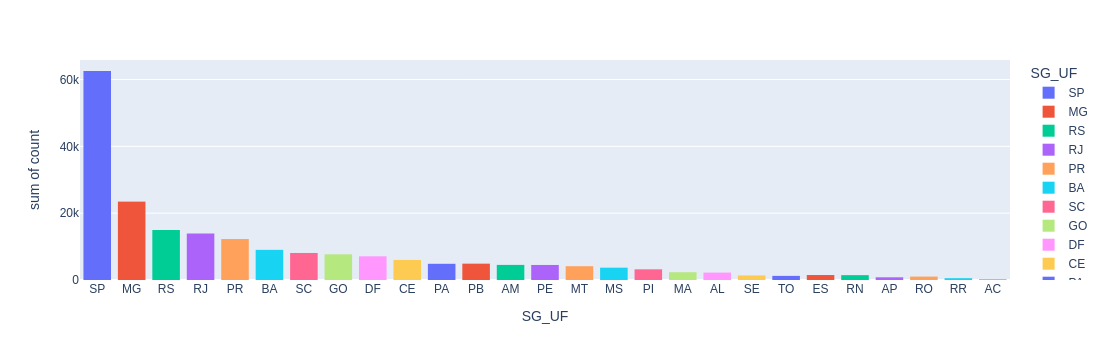

In [6]:
px.histogram(
    df.groupby(['SG_UF','OBESIDADE']).size().reset_index(name='count').sort_values(by='count', ascending=False),
    x='SG_UF',
    y='count',
    color='SG_UF')

In [7]:

x = df.groupby('GARGANTA').size().reset_index(name='count').sort_values(by='count', ascending=False)

px.histogram(
     x,
     x='GARGANTA',
     y='count',
     color='GARGANTA')
x

,GARGANTA,count
1,2.0,272810
0,1.0,88554
2,9.0,12518


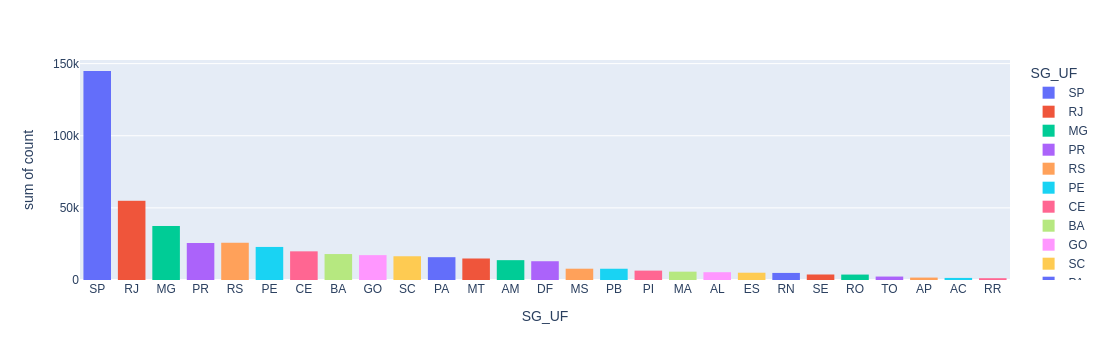

In [8]:
px.histogram(
    df.groupby(['SG_UF','CS_SEXO']).size().reset_index(name='count').sort_values(by='count', ascending=False),
    x='SG_UF',
    y='count',
    color='SG_UF')

In [9]:
X_train = df.select_dtypes(['number']).drop(columns=['EVOLUCAO'])
y_train = df['EVOLUCAO']

X_test = df.select_dtypes(['number'])

In [10]:
X_train, X_test, y_train, y_test= train_test_split(X_train, y_train, test_size = .2, random_state=2)


In [11]:
catb = CatBoostClassifier(
    iterations=100,      
    learning_rate=0.1,   
    depth=6,              
    verbose=0             
)

catb.fit(X_train, y_train)

preds = catb.predict(X_test)

Random Forest's acurracy: 73.44%

Classification report
              precision    recall  f1-score   support

         0.0       0.76      0.87      0.81     65258
         1.0       0.66      0.48      0.56     34406

    accuracy                           0.73     99664
   macro avg       0.71      0.68      0.68     99664
weighted avg       0.72      0.73      0.72     99664


Confusion Matrix


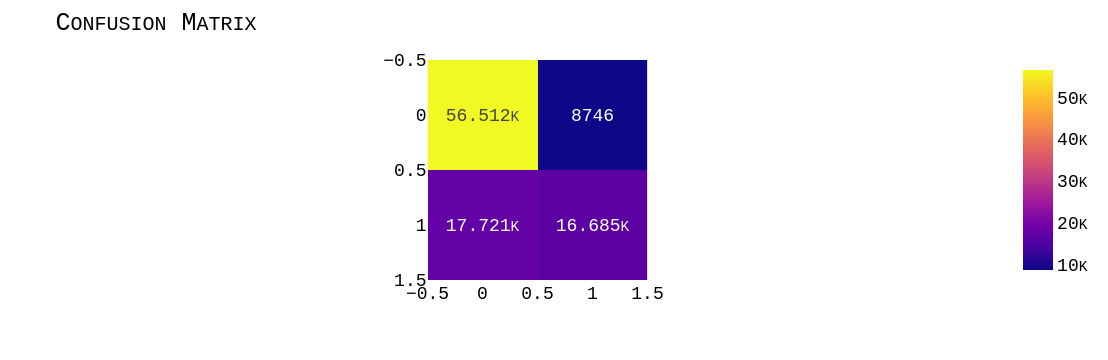

In [12]:
catboost_accuracy = accuracy_score(y_test, preds)
print(f"Random Forest's acurracy: {catboost_accuracy*100:.2f}%")

print("\nClassification report")
print(classification_report(y_test, preds))



print("\nConfusion Matrix")
cm = confusion_matrix(y_test, preds)
fig = px.imshow(cm, text_auto=True).update_layout(title={"text": "Confusion Matrix"}, font=my_font).show()


In [13]:
lightGBM = lgb.LGBMClassifier(random_state=23)

lightGBM.fit(X_train, y_train)

preds = catb.predict(X_test)

[LightGBM] [Info] Number of positive: 137628, number of negative: 261028
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012942 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 704
[LightGBM] [Info] Number of data points in the train set: 398656, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345230 -> initscore=-0.640073
[LightGBM] [Info] Start training from score -0.640073


LightGBM acurracy: 74.16%

Classification report
              precision    recall  f1-score   support

         0.0       0.76      0.87      0.81     65258
         1.0       0.66      0.48      0.56     34406

    accuracy                           0.73     99664
   macro avg       0.71      0.68      0.68     99664
weighted avg       0.72      0.73      0.72     99664


Confusion Matrix


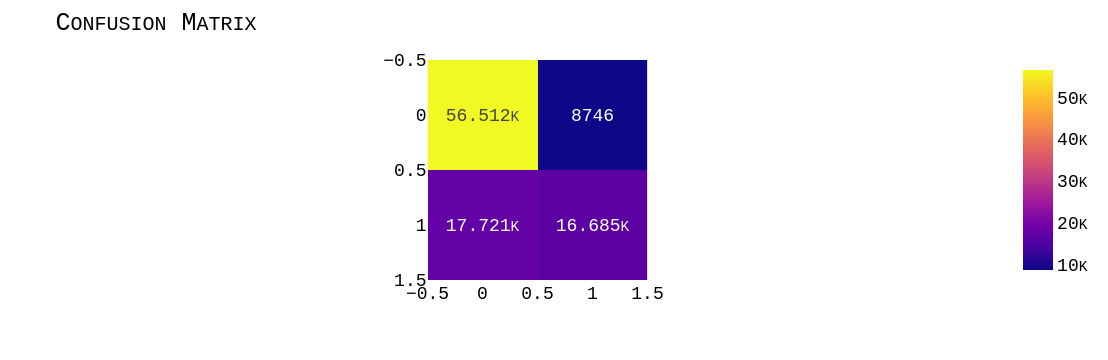

LightGBM acurracy: 74.16


In [14]:
accuracy = lightGBM.score(X_test, y_test)
print(f"LightGBM acurracy: {accuracy*100:.2f}%")
print("\nClassification report")
print(classification_report(y_test, preds))

print("\nConfusion Matrix")
cm = confusion_matrix(y_test, preds)
fig = px.imshow(cm, text_auto=True).update_layout(title={"text": "Confusion Matrix"}, font=my_font).show()

accuracy = lightGBM.score(X_test, y_test)
print(f"LightGBM acurracy: {accuracy*100:.2f}")


In [15]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Accuracy: 73.00

Classification report
              precision    recall  f1-score   support

         0.0       0.76      0.85      0.81     65258
         1.0       0.64      0.50      0.56     34406

    accuracy                           0.73     99664
   macro avg       0.70      0.68      0.68     99664
weighted avg       0.72      0.73      0.72     99664


Confusion Matrix


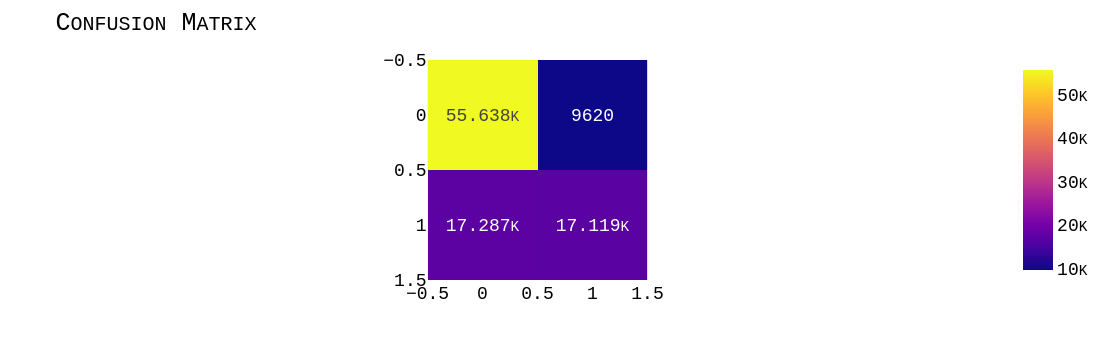

LightGBM acurracy: 74.16


In [16]:
preds = rf.predict(X_test)
accuracy = rf.score(X_test, y_test)

print(f"Accuracy: {accuracy*100:.2f}")
print("\nClassification report")
print(classification_report(y_test, preds))

print("\nConfusion Matrix")
cm = confusion_matrix(y_test, preds)
fig = px.imshow(cm, text_auto=True).update_layout(title={"text": "Confusion Matrix"}, font=my_font).show()

accuracy = lightGBM.score(X_test, y_test)
print(f"LightGBM acurracy: {accuracy*100:.2f}")
